# Проект по теме: "Как рассказать историю с помощью данных"

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Соотношение-видов-объектов-общественного-питания-по-количеству" data-toc-modified-id="Соотношение-видов-объектов-общественного-питания-по-количеству-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Соотношение видов объектов общественного питания по количеству</a></span></li><li><span><a href="#Соотношение-сетевых-и-несетевых-заведений-по-количеству" data-toc-modified-id="Соотношение-сетевых-и-несетевых-заведений-по-количеству-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Соотношение сетевых и несетевых заведений по количеству</a></span></li><li><span><a href="#Cреднее-количество-посадочных-мест-в-разрезе-по-объектам-общественного-питания" data-toc-modified-id="Cреднее-количество-посадочных-мест-в-разрезе-по-объектам-общественного-питания-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Cреднее количество посадочных мест в разрезе по объектам общественного питания</a></span></li><li><span><a href="#Топ-10-улиц-по-количеству-объектов-общественного-питания" data-toc-modified-id="Топ-10-улиц-по-количеству-объектов-общественного-питания-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Топ-10 улиц по количеству объектов общественного питания</a></span></li><li><span><a href="#Число-улиц-с-одним-объектом-общественного-питания" data-toc-modified-id="Число-улиц-с-одним-объектом-общественного-питания-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Число улиц с одним объектом общественного питания</a></span></li><li><span><a href="#Распределение-количества-посадочных-мест-для-улиц-с-большим-количеством-объектов-общественного-питания" data-toc-modified-id="Распределение-количества-посадочных-мест-для-улиц-с-большим-количеством-объектов-общественного-питания-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></div>

# Описание проекта

Я — "гуру" аналитики, и мне нужно подготовить исследование рынка заведений общественного питания в Москве. 
Заказчика интересует текущее положение дел на рынке — смогут ли они снискать популярность на долгое время.
Нужно исследовать виды заведений общественного питания, выяснить районы и улицы с максимальной концентрацией данных заведений, подготовить презентацию для заказчика.

## Загрузка данных

In [1]:
import warnings 
warnings.filterwarnings("ignore")
import json
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import scipy.stats as stats
import seaborn as sns
import warnings
import plotly.express as px

In [2]:
rest_data = pd.read_csv('/datasets/rest_data.csv', sep=',')

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
rest_data

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское шоссе, 22-й километр, домовладение 4, строение 1",36


## Предобработка данных

In [3]:
#функция для вывода данных
def data(dataframes):
    dataframes.columns = [x.lower().replace(' ', '_') for x in dataframes.columns.values]
    for column in dataframes.columns:
        print('====================')
        print(column)
        print(dataframes[column].value_counts())
        print(dataframes[column].unique())
    print(dataframes.info())
    display(dataframes.head())

In [4]:
data(rest_data)

id
163840    1
207007    1
58806     1
198074    1
150035    1
         ..
29419     1
69506     1
23278     1
185071    1
167934    1
Name: id, Length: 15366, dtype: int64
[151635  77874  24309 ... 209186 221900 222535]
object_name
Столовая                              267
Кафе                                  236
Шаурма                                234
KFC                                   155
Шоколадница                           142
                                     ... 
Чайхана «Айва»                          1
СТОЛ.ШК.1983ГУП «ШКОЛЬНОЕ ПИТАНИЕ»      1
Час Пик                                 1
САТУРН-ШБС-3 СТОЛОВАЯ ШКОЛЫ 1018        1
АРТС ПАЛАС                              1
Name: object_name, Length: 10393, dtype: int64
['СМЕТАНА' 'Родник' 'Кафе «Академия»' ... 'Бар Мята Lounge'
 'Мята Lounge Октябрьская' 'Кальянная «Мята Lounge»']
chain
нет    12398
да      2968
Name: chain, dtype: int64
['нет' 'да']
object_type
кафе                                 6099
столовая           

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [5]:
# смотрим наличие явных дубликатов
rest_data.duplicated().sum()

0

In [6]:
# переведем столбцы в строчный вид
rest_data['address'] = rest_data['address'].str.lower()
rest_data['object_name'] = rest_data['object_name'].str.lower()

In [7]:
rest_data['object_type'] = rest_data['object_type'].str.replace('предприятие быстрого обслуживания', 'фастфуд')
rest_data['object_type'] = rest_data['object_type'].str.replace('магазин \(отдел кулинарии\)', 'кулинария')

In [8]:
rest_data.duplicated(subset=['object_name', 'address', 'chain', 'object_type', 'number']).sum()

85

In [9]:
rest_data = rest_data.drop_duplicates(subset=['object_name', 'address', 'chain', 'object_type', 'number']).reset_index()

In [10]:
rest_data.duplicated(subset=['object_name', 'address', 'chain', 'object_type', 'number']).sum()

0

Первеел в нижний регистр данные столбца адрес, проверил на дубликаты и пропуски. Заменил длинные названия на короткие, для нормального отображения в графиках.

## Анализ данных

### Соотношение видов объектов общественного питания по количеству

In [11]:
# группируем по типам объектов и считаем сумму уникальных номеров заведений
object_count = rest_data.groupby('object_type').agg({'id': 'count'}).sort_values(by='id', ascending=False)
display(object_count)

,id
object_type,
кафе,6071
столовая,2584
ресторан,2282
фастфуд,1897
бар,855
буфет,576
кафетерий,395
закусочная,348
кулинария,273


Большинство заведений - кафе. С почти двукратынм отставанием столовые, рестораны и предприятия быстрого обслуживания.

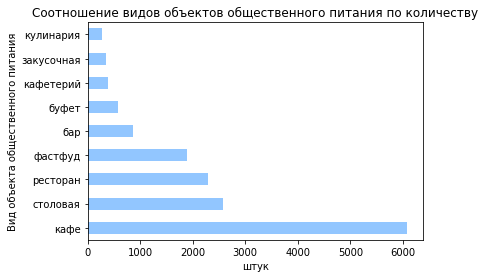

In [12]:
plt.style.use('seaborn-pastel')
object_count['id'].plot(kind='barh', stacked=True);
plt.title('Соотношение видов объектов общественного питания по количеству')
plt.xlabel('штук')
plt.ylabel('Вид объекта общественного питания')
plt.show();

### Соотношение сетевых и несетевых заведений по количеству

chain,да,нет,total
object_type,,,
кафе,1396,4675,6071
столовая,3,2581,2584
ресторан,543,1739,2282
фастфуд,788,1109,1897
бар,37,818,855
буфет,11,565,576
кафетерий,52,343,395
закусочная,56,292,348
кулинария,78,195,273


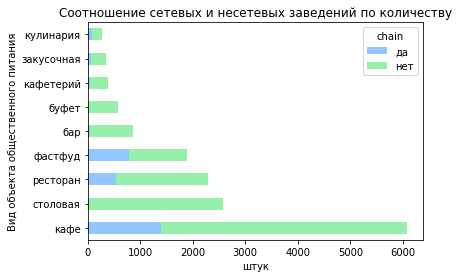

In [13]:
# создадим сводную таблицу с разделением сетевые (да) и несетевые (нет) заведения.
chain_object = rest_data.pivot_table(index='object_type', columns='chain', values='id', aggfunc='nunique')
chain_object['total'] = chain_object['да'] + chain_object['нет']
chain_object = chain_object.sort_values(by='total', ascending=False)
display(chain_object)

plt.style.use('seaborn-pastel')
chain_object[['да', 'нет']].plot(kind='barh', stacked=True)
plt.title('Соотношение сетевых и несетевых заведений по количеству')
plt.xlabel('штук')
plt.ylabel('Вид объекта общественного питания')

       
plt.show();

Большинство предприятий - несетевые. К сетевым в подавляющем большинстве относятся кафе, ресторан, фастфуд.

,id,number
object_type,,
кафе,1396,47.426934
фастфуд,788,40.319797
ресторан,543,100.362799
кулинария,78,8.679487
закусочная,56,14.375000
кафетерий,52,12.269231
бар,37,53.027027
буфет,11,12.727273
столовая,3,112.333333


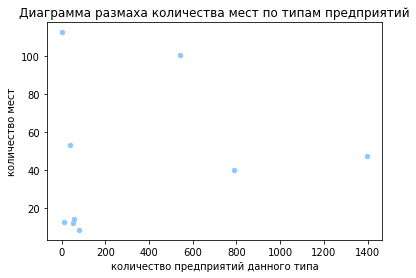

In [14]:
# Срежем до сетевых предприятий и вычислим среднее количество мест в заведении
chain_object = rest_data.query('chain == "да"')
chain_group =  chain_object.groupby('object_type').agg({'id': 'count', 'number' : 'mean'}).sort_values(by = 'id', ascending = False)
display(chain_group)
chain_group.plot(kind='scatter', x='id', y='number')
plt.title('Диаграмма размаха количества мест по типам предприятий')
plt.xlabel('количество предприятий данного типа')

plt.ylabel('количество мест');

Для сетевых предприятий характерно большое количество предприятий и небольшое количество мест (40-50 мест)

###  Cреднее количество посадочных мест в разрезе по объектам общественного питания

In [15]:
# смотрим как сильно отличаются среднее от медианы по типам объектов
rest_data.pivot_table(index = 'object_type', values = 'number', aggfunc = ['count', 'mean', 'median'])

,count,mean,median
,number,number,number
object_type,,,
бар,855,43.533333,35
буфет,576,51.425347,32
закусочная,348,7.847701,0
кафе,6071,39.785703,30
кафетерий,395,9.184810,6
кулинария,273,5.589744,0
ресторан,2282,96.884750,80
столовая,2584,130.337848,103


Явно есть выбросы.

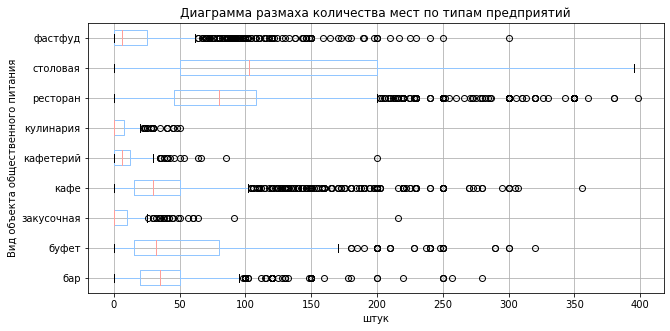

In [16]:
plt.style.use('seaborn-pastel')
rest_data.query('number < 400').boxplot(column='number', by='object_type', vert=False, figsize=(10, 5))
plt.title('Диаграмма размаха количества мест по типам предприятий')
plt.xlabel('штук')
plt.ylabel('Вид объекта общественного питания')
plt.suptitle('')
plt.show();

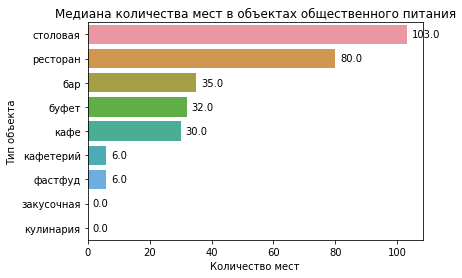

In [17]:
plt.style.use('seaborn-pastel')
graphic = rest_data.groupby('object_type').agg({'number' : 'median'}).sort_values(by = 'number', ascending = False).reset_index()
graphic
ax = sns.barplot(x='number', y='object_type', data=graphic)
ax.set_title('Медиана количества мест в объектах общественного питания')
ax.set_xlabel('Количество мест')
ax.set_ylabel('Тип объекта')
plt.xticks(rotation=0)

rects = ax.patches

for rect in rects:
    
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    
    space = 5
    
    ha = 'left'

   
    if x_value < 0:
        
        space *= -1
        
        ha = 'right'

    
    label = "{:.1f}".format(x_value)

    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)       
plt.show()

В среднем наибольшее количество мест в столовых и ресторанах. Закусочные и отделы кулинарии как правило без посадочных мест.

### Топ-10 улиц по количеству объектов общественного питания

In [18]:
# уберем из данных город зеленоград, поскольку он попадает в топ
rest_data['street_name'] = rest_data['address'].apply(lambda x: x.split(',')[1])
rest_data = rest_data.query('street_name != " город зеленоград"')
display(rest_data)
rest_data.info()

,index,id,object_name,chain,object_type,address,number,street_name
0,0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица
...,...,...,...,...,...,...,...,...
15276,15361,208537,шоколадница,да,кафе,"город москва, 3-й крутицкий переулок, дом 18",50,3-й крутицкий переулок
15277,15362,209264,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",10,улица земляной вал
15278,15363,209186,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",20,улица земляной вал
15279,15364,221900,шоколадница,да,кафе,"город москва, поселение московский, киевское шоссе, 22-й километр, домовладение 4, строение 1",36,поселение московский


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15049 entries, 0 to 15280
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        15049 non-null  int64 
 1   id           15049 non-null  int64 
 2   object_name  15049 non-null  object
 3   chain        15049 non-null  object
 4   object_type  15049 non-null  object
 5   address      15049 non-null  object
 6   number       15049 non-null  int64 
 7   street_name  15049 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.0+ MB


In [19]:
# 
temp = rest_data.groupby('street_name').count().sort_values(by='object_type', ascending=False).head(10).reset_index()
top_10 = list(temp['street_name'])
temp

,street_name,index,id,object_name,chain,object_type,address,number
0,проспект мира,203,203,203,203,203,203,203
1,профсоюзная улица,181,181,181,181,181,181,181
2,ленинградский проспект,170,170,170,170,170,170,170
3,пресненская набережная,167,167,167,167,167,167,167
4,варшавское шоссе,161,161,161,161,161,161,161
5,ленинский проспект,147,147,147,147,147,147,147
6,поселение сосенское,137,137,137,137,137,137,137
7,проспект вернадского,128,128,128,128,128,128,128
8,кутузовский проспект,114,114,114,114,114,114,114
9,каширское шоссе,111,111,111,111,111,111,111


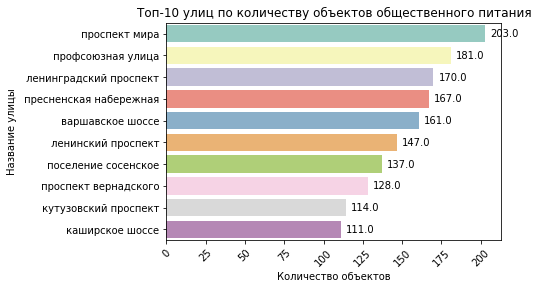

In [20]:
ax = sns.barplot(x='object_type', y='street_name', data=temp, palette="Set3")
ax.set_title('Топ-10 улиц по количеству объектов общественного питания')
ax.set_xlabel('Количество объектов')
ax.set_ylabel('Название улицы')
plt.xticks(rotation=45)
rects = ax.patches


for rect in rects:
    
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    
    space = 5
    
    ha = 'left'

    
    if x_value < 0:
        
        space *= -1
        
        ha = 'right'

    
    label = "{:.1f}".format(x_value)

    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),         
        textcoords="offset points", 
        va='center',                
        ha=ha)       
plt.show()

Наиболее популярные улицы проспект Мира, Профсоюзная улица, Ленинградский проспект. Думаю, что это не тот топ который нам нужен. БОльшее значение будет иметь концентрация таких заведений на условно квадратный километр. То есть топ по районам. Хотя тут непонятно, как это должно выглядеть в данных, поскольку административные районы не пойдут в силу различий в размерах как и улицы.

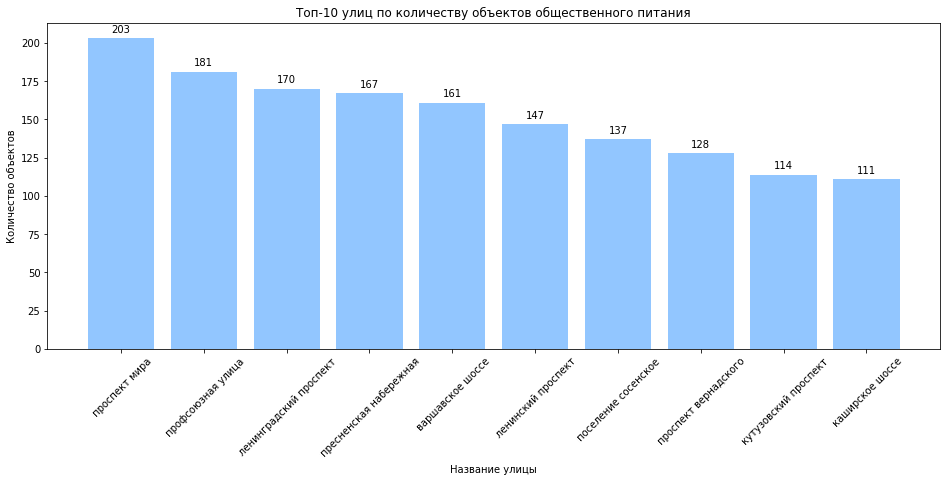

In [21]:
plt.figure(figsize=(16,6))

plt.bar(temp["street_name"],temp["object_type"])
plt.title('Топ-10 улиц по количеству объектов общественного питания')
plt.xlabel('Название улицы')
plt.ylabel('Количество объектов')

plt.xticks(rotation=45)

for x,y in zip(temp["street_name"],temp["object_type"]):

    label = "{}".format(y)

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,6), 
                 ha='center') 


plt.show()

In [22]:
# выгрузим данные по районам и улицам
from io import BytesIO
import requests
spreadsheet_id = '1CPDYDGjKCb6jGoQt9KR5WOvTspK-dHS3NUrVeqsyqJs'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
district = pd.read_csv(BytesIO(r.content))
district

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [23]:
district['streetname'] = district['streetname'].str.lower()
district = district.rename(columns={'streetname':'street_name'})
temp['street_name'] = temp['street_name'].str.strip()

In [24]:
#объединяем районы с улицами
include_streets = temp.merge(district, on='street_name', how='left')
include_streets = include_streets.drop(['id','areaid', 'object_name', 'chain', 'object_type', 'address', 'number'],1)
include_streets

,street_name,index,okrug,area
0,проспект мира,203,СВАО,Алексеевский район
1,проспект мира,203,СВАО,Ярославский Район
2,проспект мира,203,СВАО,Район Марьина роща
3,проспект мира,203,СВАО,Останкинский район
4,проспект мира,203,СВАО,Район Ростокино
5,проспект мира,203,СВАО,Район Свиблово
6,проспект мира,203,ЦАО,Мещанский район
7,профсоюзная улица,181,ЮЗАО,Академический район
8,профсоюзная улица,181,ЮЗАО,Район Черемушки
9,профсоюзная улица,181,ЮЗАО,Район Ясенево


Соотнесли районы с улицами.

### Число улиц с одним объектом общественного питания

In [25]:
# срежем до 1 предприятия питания на 1 улице
one = rest_data.groupby('street_name').agg({'object_name': 'count'}).sort_values(by = 'object_name', ascending = False)
one = one.query('object_name == 1')
one = one.drop('object_name',1)
one = one.reset_index()
one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   street_name  579 non-null    object
dtypes: object(1)
memory usage: 4.6+ KB


In [26]:
#Добавим район и округ и удалим сразу дубликаты
one['street_name'] = one['street_name'].str.strip()
one = one.merge(district, on='street_name', how='left')
area_nunique = one['area'].drop_duplicates()
area_nunique = area_nunique.dropna()
len(area_nunique)

99

In [27]:
area_nunique.head(10)

0     Красносельский район
1          Можайский Район
3           Район Аэропорт
4      Тимирязевский Район
5          Район Лефортово
6        Пресненский район
7      Нижегородский район
11    Район Соколиная Гора
13        Район Сокольники
14       Район Богородское
Name: area, dtype: object

579 улиц с одним объектом общественного питания.

### Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

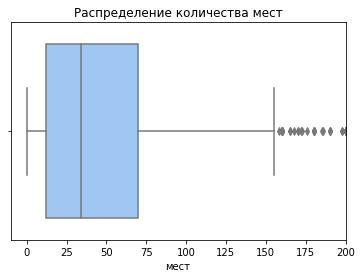

In [28]:
# построим диаграмму распределения мест в заведениях
plt.style.use('seaborn-pastel')
temp = rest_data[rest_data['street_name'].isin(top_10)]
ax = sns.boxplot(x=temp['number'])
ax.set_xlim(-10,200)
plt.title('Распределение количества мест')
plt.xlabel('мест')
plt.show()

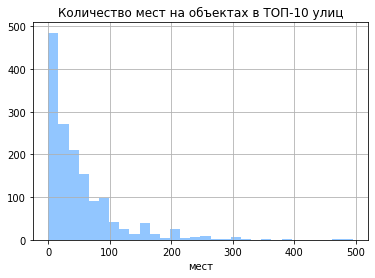

In [29]:
temp_2 = temp.query('number < 500')
plt.style.use('seaborn-pastel')
temp_2['number'].hist(bins=30)
plt.title('Количество мест на объектах в ТОП-10 улиц')
plt.xlabel('мест')
plt.show();

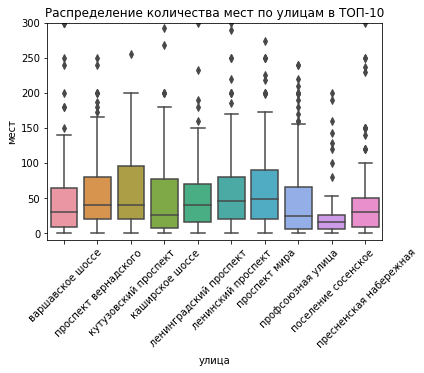

In [30]:
plt.style.use('seaborn-pastel')
ax = sns.boxplot(x="street_name", y="number", data=temp, orient='v')
plt.xticks(rotation=45)
ax.set_ylim(-10,300)
plt.title('Распределение количества мест по улицам в ТОП-10')
plt.xlabel('улица')
plt.ylabel('мест')
plt.show()

In [31]:
temp['number'].describe()

count    1519.000000
mean       54.949309
std        88.031118
min         0.000000
25%        12.000000
50%        34.000000
75%        70.000000
max      1700.000000
Name: number, dtype: float64

In [32]:
rest_data['number'].describe()

count    15049.000000
mean        59.576982
std         74.928754
min          0.000000
25%         13.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

Количество посадочных мест на популярных улицах небольшое, что вероятно объясняется повышенной стоимостью аренды.

### Вывод

- Основные типы предприятий общественного питания - это кафе (с большим отрывом), ресторан и столовая. 
- В основном предприятия несетевые. 
- Для сетевых предприятий характерно большое количество предприятий и небольшое количество мест (30-40 мест). Как проавило это кафе. 
- В среднем наибольшее количество мест в столовых и ресторанах. Закусочные и отделы кулинарии как правило без посадочных мест.
- Наиболее популярные улицы проспект Мира, Профсоюзная улица, Ленинградский проспект.
- Количество посадочных мест на популярных улицах небольшое, что вероятно объясняется повышенной стоимостью аренды.

Стоит обратить на улицы с минимальным количеством объектов общественного питания, но приближенных к популярным районам у любителей общественного питания.  
Тип заведения - "кафе" с количеством посадочных мест 30-50.

Презентация: <https://disk.yandex.ru/i/lJy77Ai_tdST2A> 